In [23]:
import numpy as np
import re
with open("./statistic/noise_ModelNet40.txt", 'r') as f:
    lines = [tuple(line.rstrip().split()) for line in f.readlines()]

count = {}
for line in lines:
    name, valid, total, ratio = line
    pattern = r"_\d{4}"
    matches = re.findall(pattern, name)
    name = name.split(matches[0])[0]
    if name not in count:
        stat = {
            "valid": [],
            "total": [],
            "ratio": []
        }
        count[name] = stat
    count[name]["valid"].append(int(valid))
    count[name]["total"].append(int(total))
    count[name]["ratio"].append(float(ratio))

print("name\tvalid\ttotal\tratio")
for key, val in count.items():
    print(f"{key}\t", end="")
    print(f"{np.array(val['valid']).mean():5.2f}\t", end="")
    print(f"{np.array(val['total']).mean():5.2f}\t", end="")
    print(f"{np.array(val['ratio']).mean():5.2f}\t", end="")
    print("")


name	valid	total	ratio
radio	11.23	19.78	 0.42	
bed	10.40	31.87	 0.32	
monitor	10.68	19.86	 0.53	
lamp	35.80	107.58	 0.46	
vase	21.36	51.49	 0.44	


In [26]:
import numpy as np
import re
with open("./statistic/noise_3DMatch.txt", 'r') as f:
    lines = [tuple(line.rstrip().split()) for line in f.readlines()]

room_names = [
    "analysis-by-synthesis-apt1",
    "bundlefusion-office",
    "sun3d-harvard",
    "sun3d-mit",
    "7-scenes-redkitchen"
]
count = {}
for line in lines:
    name, valid, total, ratio = line
    name = name.split("@")[0]
    for room_name in room_names:
        if room_name in name:
            name = room_name
            break
    if name not in count:
        stat = {
            "valid": [],
            "total": [],
            "ratio": []
        }
        count[name] = stat
    count[name]["valid"].append(int(valid))
    count[name]["total"].append(int(total))
    count[name]["ratio"].append(float(ratio))

print("name\tvalid\ttotal\tratio")
for key, val in count.items():
    print(f"{key}\t", end="")
    print(f"{np.array(val['valid']).mean():5.2f}\t", end="")
    print(f"{np.array(val['total']).mean():5.2f}\t", end="")
    print(f"{np.array(val['ratio']).mean():5.2f}\t", end="")
    print("")

name	valid	total	ratio
sun3d-mit	48.96	686.63	 0.08	
bundlefusion-office	77.31	761.21	 0.10	
sun3d-harvard	33.05	1054.55	 0.03	
analysis-by-synthesis-apt1	69.33	475.67	 0.17	
7-scenes-redkitchen	56.89	883.45	 0.06	


In [2]:
dumpfile = open("./results/statistic/ModelNet40_count_midium.txt", 'r')
lines = [tuple(line.rstrip().split()) for line in dumpfile.readlines()]

register_valid = 0
for line in lines:
    if len(line) > 2:
        register_valid += 1

print(register_valid / len(lines))

dumpfile.close()

0.5647163120567376


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'airplane'),
  Text(1, 0, 'bathtub'),
  Text(2, 0, 'bed'),
  Text(3, 0, 'bench'),
  Text(4, 0, 'bookshelf'),
  Text(5, 0, 'bottle'),
  Text(6, 0, 'bowl'),
  Text(7, 0, 'car'),
  Text(8, 0, 'chair'),
  Text(9, 0, 'cone'),
  Text(10, 0, 'cup'),
  Text(11, 0, 'curtain'),
  Text(12, 0, 'desk'),
  Text(13, 0, 'door'),
  Text(14, 0, 'dresser'),
  Text(15, 0, 'flower_pot'),
  Text(16, 0, 'glass_box'),
  Text(17, 0, 'guitar'),
  Text(18, 0, 'keyboard'),
  Text(19, 0, 'lamp'),
  Text(20, 0, 'laptop'),
  Text(21, 0, 'mantel'),
  Text(22, 0, 'monitor'),
  Text(23, 0, 'night_stand'),
  Text(24, 0, 'person'),
  Text(25, 0, 'piano'),
  Text(26, 0, 'plant'),
  Text(27, 0, 'radio'),
  Text(28, 0, 'range_hood'),
  Text(29, 0, 'sink'),
  Text(30, 0, 'sofa'),
  Text(31, 0, 'stairs'),
  Text(32, 0, 'stool'),
 

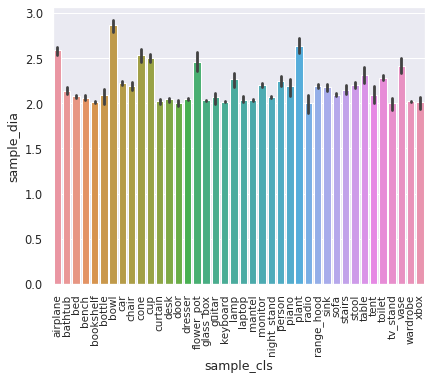

In [10]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.notebook_repr_html=False  # 表格显示
plt.rcParams['figure.dpi'] = 75  # 图形分辨率
sns.set_theme(style='darkgrid')  # 图形主题

sample_cls = []
sample_dia = []

data_root = "/home/hm/fuguiduo/datasets/modelnet40/txt"
model_dirs = sorted(os.listdir(data_root))
for model_cls in model_dirs:
    if not os.path.isdir(os.path.join(data_root, model_cls)):
        continue
    samples = sorted(os.listdir(os.path.join(data_root, model_cls)))
    for sample in samples[:50]:
        coord = np.loadtxt(os.path.join(data_root, model_cls, sample), delimiter=",")[:, :3]
        min_coord = coord.min(axis=0)
        max_coord = coord.max(axis=0)
        diameter = np.sqrt(((max_coord - min_coord) ** 2).sum())
        sample_cls.append(model_cls)
        sample_dia.append(diameter)

df = pd.DataFrame({"sample_cls": sample_cls, "sample_dia": sample_dia})
sns.barplot(
    x="sample_cls",
    y="sample_dia",
    data=df
)
plt.xticks(rotation=90, fontsize=10)